In [87]:
import os
import numpy as np
import yt
import matplotlib.pyplot as plt
import glob
from mpl_toolkits.axes_grid1 import ImageGrid

yt.__version__

# # assume that our data is in CGS
# from yt.units import cm, amuÇ
# from yt.frontends.boxlib.api import MaestroDataset

'4.2.dev0'

In [89]:
# figure out last file
# run_dir = os.environ.get("PSCRATCH")+"/xrb_layered/"
# run_dir = os.environ.get("PSCRATCH")+"/xrb_layered/RUN4/"
run_dir = os.environ.get("PSCRATCH")+"/xrb_layered/RUN7/"
# run_dir = os.environ.get("PSCRATCH")+"/xrb_layered/RUN8/"


plotfiles = glob.glob(run_dir+"PLOTS/xrb*")
plotfiles = [file for file in plotfiles if "old" not in file]
Nums = [int(file.split("_")[-1]) for file in plotfiles if ("after" not in file and "Init" not in file)]
Nlast = max(Nums)
ds1 = yt.load(run_dir+"PLOTS/xrb_0000000", hint="maestro")
ds2 = yt.load(run_dir+"PLOTS/xrb_%07d"%Nlast, hint="maestro")

print(f"Last plotfile #{Nlast}, simulation time {ds2.current_time:.3e}")


# 
# ds1 = yt.load(run_dir+"PLOTS/xrb_InitData", hint="maestro")
# ds2 = yt.load(run_dir+"PLOTS/xrb_after_InitProj", hint="maestro")

Last plotfile #23798, simulation time 1.970e-02 code_time


In [35]:
ds2.print_stats()
print(ds2.field_list)
# ds2.derived_field_list

# field widget tab
# ds2.fields

# some info might need to get

# model
# ds2.current_time
# ds2.timestep # doesn't exist

# dimensions
# ds2.domain_dimensions
# ds2.domain_right_edge  # actually right and top

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	    64	        262144	            64
----------------------------------------------
   	    64	        262144


t = 1.60066182e-03 = 1.60066182e-03 s = 5.07219124e-11 years

Smallest Cell:
	Width: 1.944e-24 Mpc Mpc
	Width: 1.944e-18 pc pc
	Width: 4.011e-13 AU AU
	Width: 6.000e+00 cm cm
[('boxlib', 'Hnuc'), ('boxlib', 'MachNumber'), ('boxlib', 'Pi'), ('boxlib', 'S'), ('boxlib', 'X(c12)'), ('boxlib', 'X(c13)'), ('boxlib', 'X(f17)'), ('boxlib', 'X(f18)'), ('boxlib', 'X(f19)'), ('boxlib', 'X(fe56)'), ('boxlib', 'X(h1)'), ('boxlib', 'X(he4)'), ('boxlib', 'X(mg22)'), ('boxlib', 'X(mg24)'), ('boxlib', 'X(n13)'), ('boxlib', 'X(n14)'), ('boxlib', 'X(n15)'), ('boxlib', 'X(ne18)'), ('boxlib', 'X(ne19)'), ('boxlib', 'X(ne20)'), ('boxlib', 'X(o14)'), ('boxlib', 'X(o15)'), ('boxlib', 'X(o16)'), ('boxlib', 'X(o17)'), ('boxlib', 'X(o18)'), ('boxlib', 'abar'), ('boxlib', 'ad_excess'), ('boxlib', 'conductivity

In [90]:
# Compare beginning and end

def compare_one_var(var_name, use_log=False, minimum=None, maximum=None, cmap='viridis'):
    fig = plt.figure()
    grid = ImageGrid(fig, (0.075,0.075,0.85,0.85),
        nrows_ncols = (1,2),
        label_mode = "L",
        share_all = True,
        axes_pad = 1.0,
        cbar_location="right",
        cbar_mode="each",
        cbar_size="3%",
        cbar_pad="0%")
    
    if minimum is None:
        minimum = 'min'
    if maximum is None:
        maximum = 'max'
        
    for i,ds in enumerate((ds1,ds2)):
        plot = yt.SlicePlot(ds, 'z', var_name)
        plot.set_cmap(var_name, cmap)
        p = plot.plots[var_name]
        p.figure = fig
        p.axes = grid[i].axes
        p.cax = grid.cbar_axes[i]
        p.cax.set_label("")
        plot.set_zlim(var_name, minimum, maximum)
        plot.set_log(var_name, use_log)
        # print(plot.get_zlim(var_name))
        plot._setup_plots()
        
    # return fig

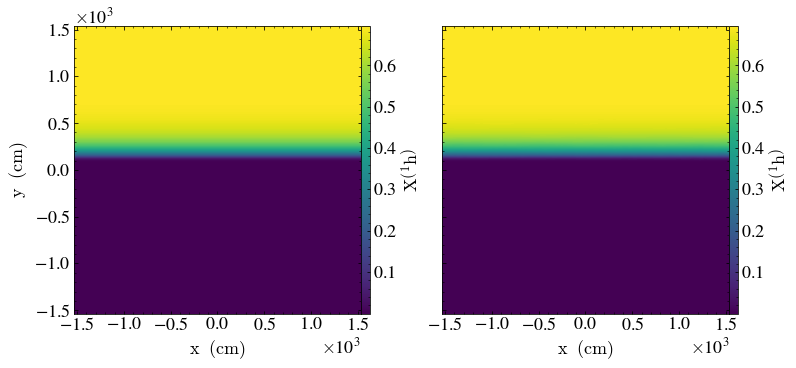

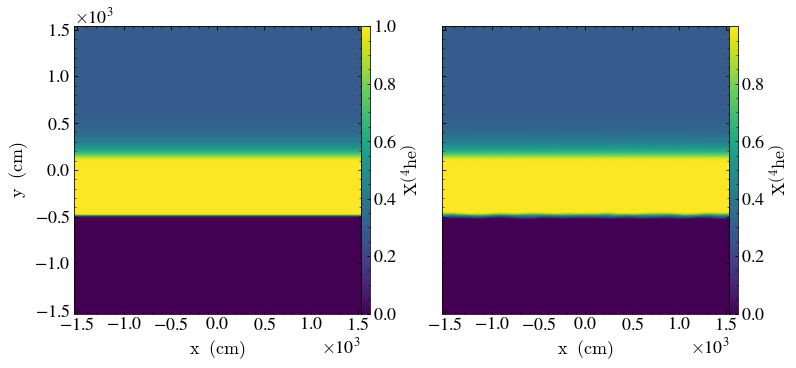

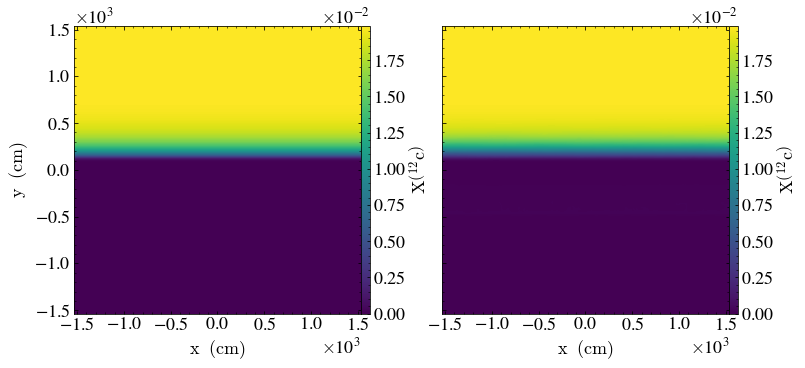

In [91]:
# stop yt verbose
yt.set_log_level(50)

# compare_one_var('abar', use_log=True)
# compare_one_var('X(h1)')
# compare_one_var('X(he4)', cmap='viridis')
# compare_one_var('X(c12)')
# compare_one_var('X(c13)')
# compare_one_var('X(o18)')
# compare_one_var('X(f17)')
# compare_one_var('X(mg24)')
# compare_one_var('X(fe56)')

# compare_one_var('omegadot(h1)')
# compare_one_var('omegadot(he4)')
# compare_one_var('omegadot(c12)')
# compare_one_var('omegadot(c13)')
# compare_one_var('omegadot(o18)')
# compare_one_var('omegadot(f17)')
# compare_one_var('omegadot(mg24)')
# compare_one_var('omegadot(fe56)')

# compare_one_var('rho', use_log=True)
# compare_one_var('rho0', use_log=True)
# compare_one_var('Hnuc', use_log=True, cmap='inferno', minimum=1e14, maximum=1e18)
# compare_one_var('Hnuc', use_log=False, cmap='inferno')

# compare_one_var('velx', cmap='cividis')
# compare_one_var('vely', cmap='cividis')
# compare_one_var('vort', cmap='cividis')
# compare_one_var('vort', cmap='cividis', minimum=-2e5, maximum=2e5)


# compare_one_var('tfromp', use_log=True, cmap='hot')
# compare_one_var('tfromp', use_log=False, cmap='hot')
# compare_one_var('tfromp', use_log=False, cmap='hot', minimum=2e8,maximum = 3e8)
# compare_one_var(('gas','temperature'), use_log=False) # same!
# compare_one_var('tpert', use_log=False)
# compare_one_var('MachNumber', cmap='cividis')

# compare_one_var('entropy', cmap='cividis')
# compare_one_var('ad_excess', cmap='cividis', minimum=0, maximum=2)
# compare_one_var('ad_excess', cmap='bwr', minimum=-1, maximum=1)


# compare_one_var('sponge')

# fig1=compare_one_var('rho', use_log=True)
# fig2=compare_one_var('sponge')
# fig1.savefig('rho.png',bbox_inches='tight',dpi=500)
# fig2.savefig('sponge.png',bbox_inches='tight',dpi=500)

(-1500.0, 1500.0, -1500.0, 1500.0)

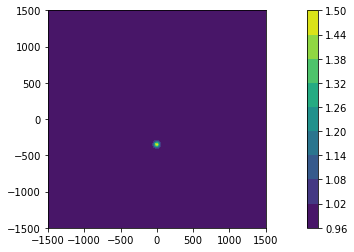

In [64]:
# temperature perturbation
H = 1.5e3
x=y=np.linspace(-H,H,200)
xx,yy = np.meshgrid(x,y)

pert_size = 50
pert_factor = 0.5
pert_height = 1100

rad_pert = -pert_size**2 /(4.0 * np.log(0.5))
dist2 = xx**2 + (yy - (H/2-pert_height))**2
Tpert = 1.0 + pert_factor * np.exp(-dist2 / rad_pert)

plt.contourf(xx,yy,Tpert)
plt.colorbar()
plt.axis('square')

In [54]:
np.max(Tpert)

1.0134906942929405